<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Practica_25_Arbol_de_Decisi%C3%B3n_1_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Practica 25. Arbol de Decisión 1**

## **Objetivos del ejercicio:**  

* Comprender el uso del algoritmo de Decision Tree para tareas de clasificación.
* Practicar la preparación de datos para un modelo de Machine Learning.
* Evaluar la precisión del modelo usando diferentes métricas.


Instrucciones:

1. Carga de Datos: Carga el conjunto de datos de vivienda desde una URL pública.
"https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv o emplea los datos adjuntos
Las columnas de los datos son las siguientes: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' 'MEDV' . La ultima columna es la salida

2. Análisis de Datos: Realiza un análisis descriptivo y visualiza la distribución de las características.

3. Preprocesamiento: Maneje cualquier valor nulo y codifica las características si es necesario.

4. División de Conjuntos: Divida los datos en conjuntos de entrenamiento y prueba.

5. Entrenamiento: Entrene un árbol de decisión.

6. Optimización: Experimente con la profundidad del árbol (max_depth) y observa cómo afecta la precisión.

7. Evaluación: Evalúa el modelo utilizando precisión, recall y F1-score

## **1. Cargar Datos**

In [79]:
from IPython.display import display, HTML
import pandas as pd

display(HTML("<h3 style='color:blue; font-size:18px;'> Cargar el Dataset </h3>"))

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

df = pd.read_csv(url, header=None)

print(df)

          0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90

In [80]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Cambiar el nombre de las columnas del Dataset </h3>"))

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = df.rename(columns={i: column_names[i] for i in range(len(column_names))})

print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

## **2. Análisis de Datos: Realiza un análisis descriptivo y visualiza la distribución de las características**

In [81]:
display(HTML("<h3 style='color:blue; font-size:14px;'> Información del Dataset </h3>"))
print(df.info())
print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Análisis descriptivo de las características </h3>"))
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None




             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

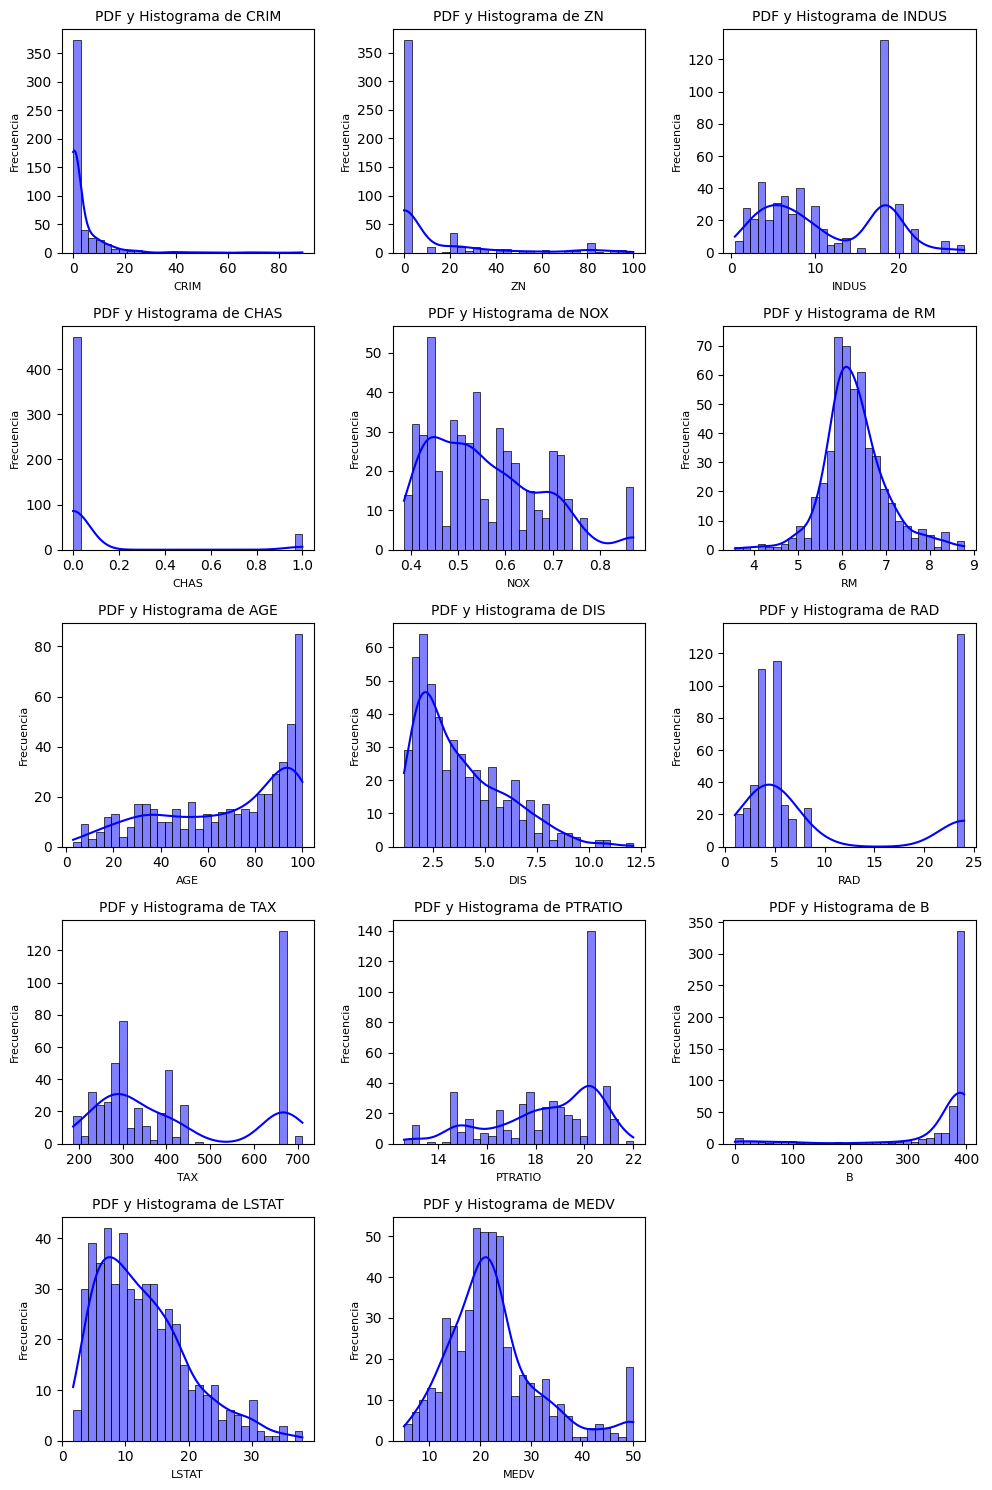

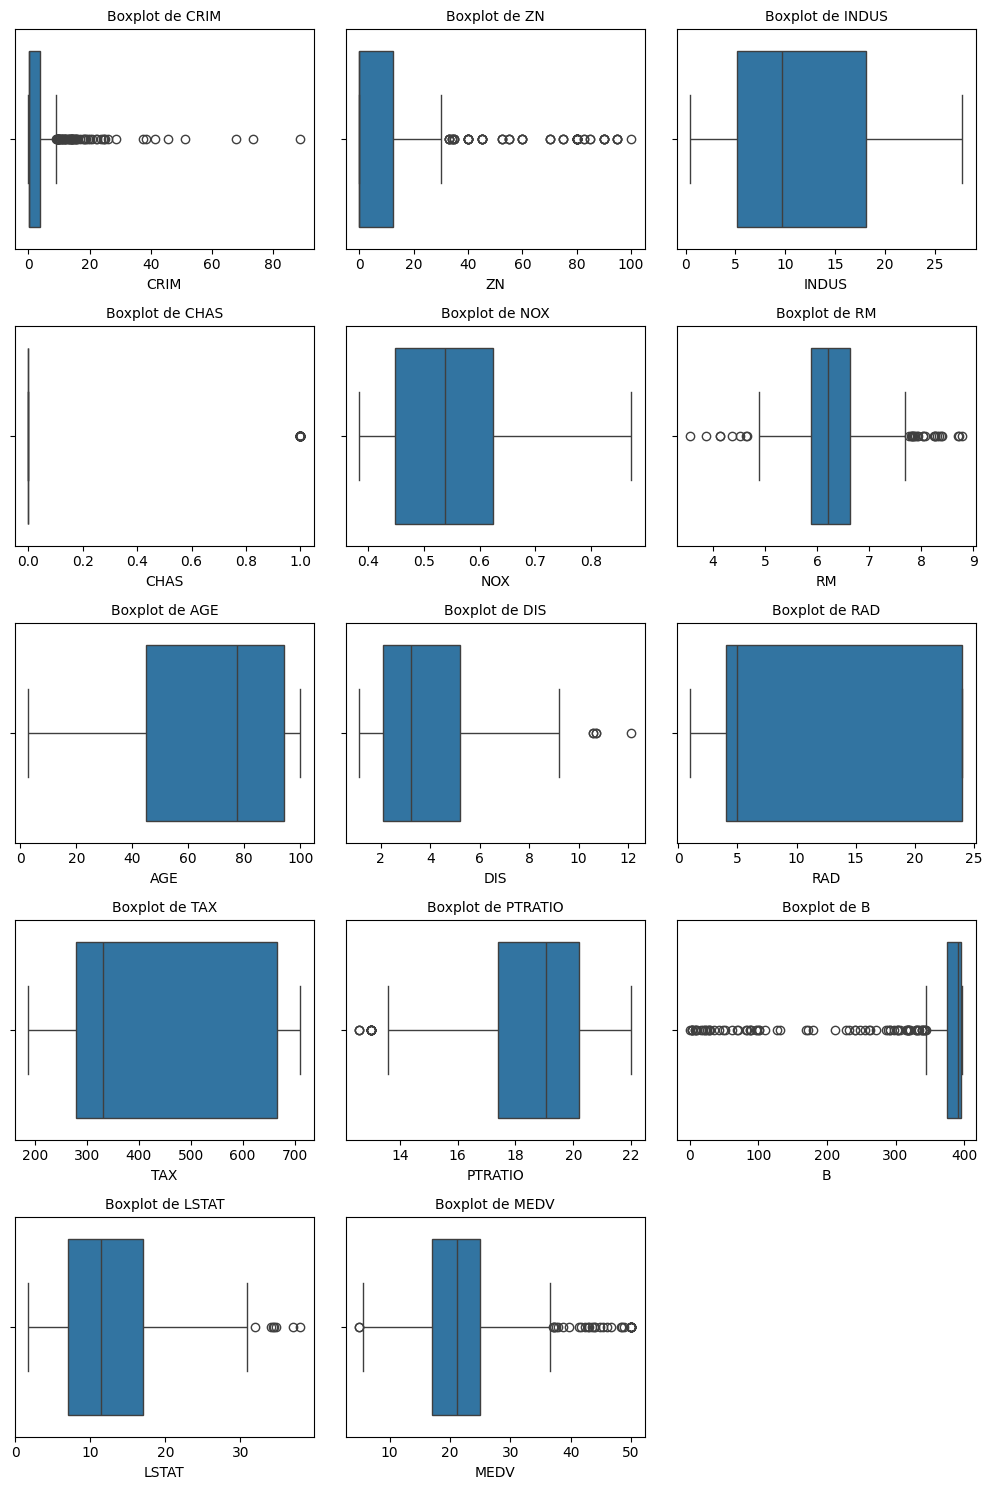

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

display(HTML("<h3 style='color:blue; font-size:14px;'> Distribución de las características </h3>"))

colum_num = df.select_dtypes(include=['float64', 'int64']).columns
# print(columnas)

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(10, 15))
for i, col in enumerate(colum_num, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)

plt.tight_layout()
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Boxplots de variables numéricas del Dataset </h3>"))
plt.figure(figsize=(10, 15))
for i, col in enumerate(colum_num, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}', fontsize=10)

plt.tight_layout()
plt.show()

## **3. Preprocesamiento: Maneje cualquier valor nulo y codifica las características si es necesario**

In [83]:
display(HTML("<h3 style='color:blue; font-size:16px;'> Revisión inicial de nulos y tipo de datos</h3>"))

print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))
print('\n')

print("\nTipo de datos:")
print(df.dtypes)


Cantidad de valores nulos por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64



Tipo de datos:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


## **4. División de Conjuntos: Divida los datos en conjuntos de entrenamiento y prueba**

In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

display(HTML("<h3 style='color:blue; font-size:16px;'> División de Datos en Conjuntos de Entrenamiento y Prueba</h3>"))

# Separa las variables features (X) and target (y)
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
target_col = 'MEDV'

X = df[feature_cols].copy()
umbral = df['MEDV'].mean()
y = (df['MEDV'] >= umbral).astype(int)   # 1 = alto, 0 = bajo
print(f"Umbral (mediana MEDV): {umbral:.3f}")

# Datos Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("datos de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Umbral (mediana MEDV): 22.533
Datos de entrenamiento (X_train, y_train): (404, 13) (404,)
datos de prueba (X_test, y_test): (102, 13) (102,)


## **5. Entrenamiento: Entrene un árbol de decisión**

In [85]:
display(HTML("<h3 style='color:blue; font-size:16px;'> Entrenamiento del modelo </h3>"))

#Modelo de clasificación
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        65
           1       0.97      0.78      0.87        37

    accuracy                           0.91       102
   macro avg       0.93      0.88      0.90       102
weighted avg       0.92      0.91      0.91       102

[[64  1]
 [ 8 29]]


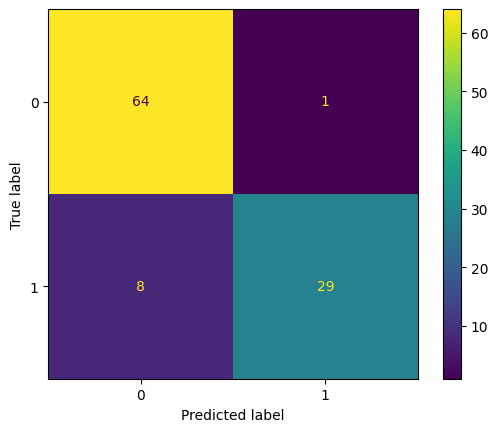

In [86]:

### Paso 4: Evaluar rendimiento

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## **6. Optimización: Experimente con la profundidad del árbol (max_depth) y observa cómo afecta la precisión.**

In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

depths = range(1, 21)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=2025)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)
    print('\n')
    print(f"Profundidad: {d}")
    print("Resultados:")

    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")



Profundidad: 1
Resultados:
accuracy: 0.8221
precision_macro: 0.8359
recall_macro: 0.8114
f1_macro: 0.8135


Profundidad: 2
Resultados:
accuracy: 0.8340
precision_macro: 0.8513
recall_macro: 0.8201
f1_macro: 0.8245


Profundidad: 3
Resultados:
accuracy: 0.8537
precision_macro: 0.8569
recall_macro: 0.8423
f1_macro: 0.8466


Profundidad: 4
Resultados:
accuracy: 0.8399
precision_macro: 0.8467
recall_macro: 0.8287
f1_macro: 0.8319


Profundidad: 5
Resultados:
accuracy: 0.8458
precision_macro: 0.8504
recall_macro: 0.8311
f1_macro: 0.8369


Profundidad: 6
Resultados:
accuracy: 0.8518
precision_macro: 0.8568
recall_macro: 0.8369
f1_macro: 0.8431


Profundidad: 7
Resultados:
accuracy: 0.8557
precision_macro: 0.8564
recall_macro: 0.8445
f1_macro: 0.8488


Profundidad: 8
Resultados:
accuracy: 0.8518
precision_macro: 0.8535
recall_macro: 0.8404
f1_macro: 0.8447


Profundidad: 9
Resultados:
accuracy: 0.8399
precision_macro: 0.8389
recall_macro: 0.8309
f1_macro: 0.8335


Profundidad: 10
Resultados

## **7. Evaluación: Evalúa el modelo utilizando precisión, recall y F1-score**

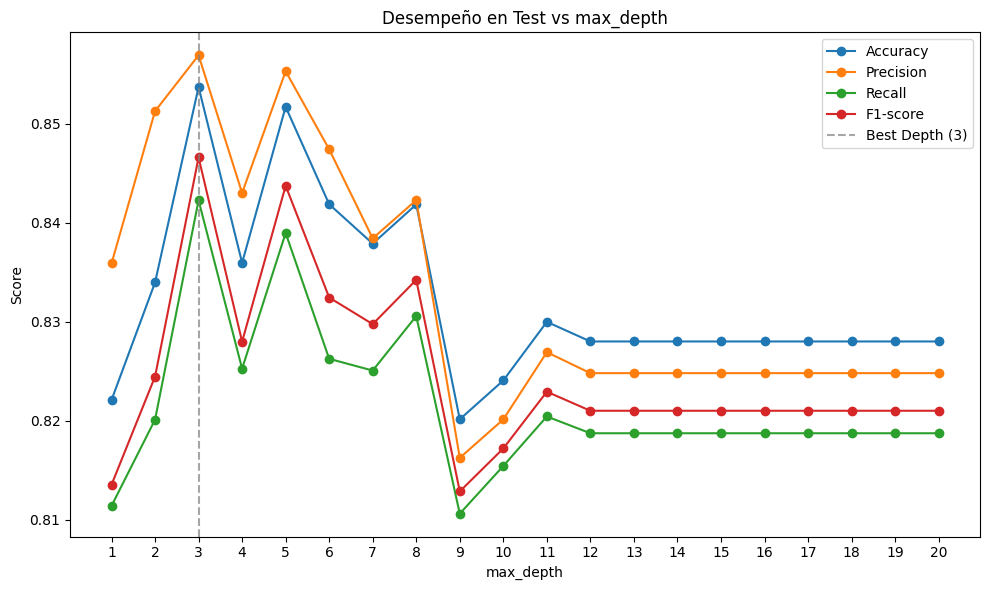

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if hist_df exists before plotting
if 'hist_df' in locals() or 'hist_df' in globals():
    plt.figure(figsize=(10, 6))
    plt.plot(hist_df["depth"], hist_df["accuracy"], marker="o", label="Accuracy")
    plt.plot(hist_df["depth"], hist_df["precision"], marker="o", label="Precision")
    plt.plot(hist_df["depth"], hist_df["recall"], marker="o", label="Recall")
    plt.plot(hist_df["depth"], hist_df["f1"], marker="o", label="F1-score")

    # Check if best_depth exists before plotting the vertical line
    if 'best_depth' in locals() or 'best_depth' in globals():
        plt.axvline(best_depth, linestyle="--", alpha=0.7, color='gray', label=f'Best Depth ({best_depth})')


    plt.title("Desempeño en Test vs max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("Score")
    plt.xticks(hist_df["depth"])
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Error: DataFrame 'hist_df' not found. Please run the previous cell to generate it.")

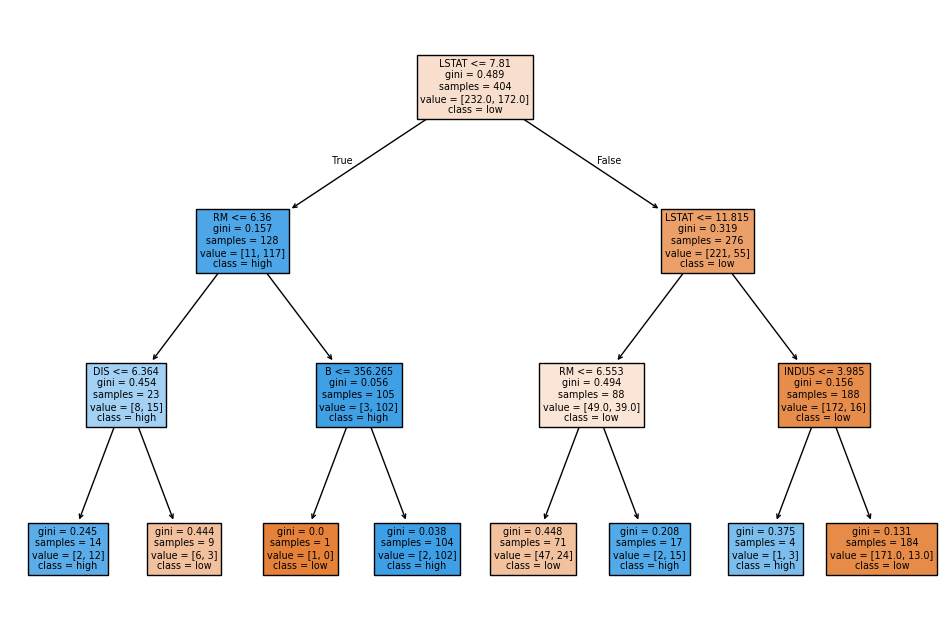

In [89]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['low', 'high'])
plt.show()
